# AI & ML Internship - Task 6: K-Nearest Neighbors (KNN) Classification

## **Objective**

The objective of this task is to understand and implement the K-Nearest Neighbors (KNN) algorithm for classification problems using the Iris dataset.

---

## **Dataset Description**

The Iris dataset contains the following columns:

- `SepalLengthCm`
- `SepalWidthCm`
- `PetalLengthCm`
- `PetalWidthCm`
- `Species` (Target variable)

---

## **Libraries Required**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Load Dataset**

We will load the dataset and explore the first few records.

In [2]:
# If reading from CSV, replace path with your file
df = pd.read_csv('Iris.csv')

# Drop Id column if exists
df = df.drop(columns=['Id'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **Data Preprocessing**

### Check for missing values

In [3]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Encode Target Variable

The `Species` column is categorical. We will encode it using `LabelEncoder`.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Normalization

It is important to normalize features in KNN to ensure equal contribution from each feature.

In [5]:
scaler = StandardScaler()
X = df.drop('Species', axis=1)
y = df['Species']

X_scaled = scaler.fit_transform(X)

## **Train-Test Split**

We split the data into training and testing sets (80%-20% split).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## **KNN Model Implementation**

We start with `K=5` and evaluate model performance.

In [7]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

## **Model Evaluation**

We evaluate using accuracy and confusion matrix.

In [8]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy for K={k}: {accuracy:.2f}')
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy for K=5: 0.93

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



## **Experimenting with Different K Values**

We will check accuracy for K values from 1 to 20.

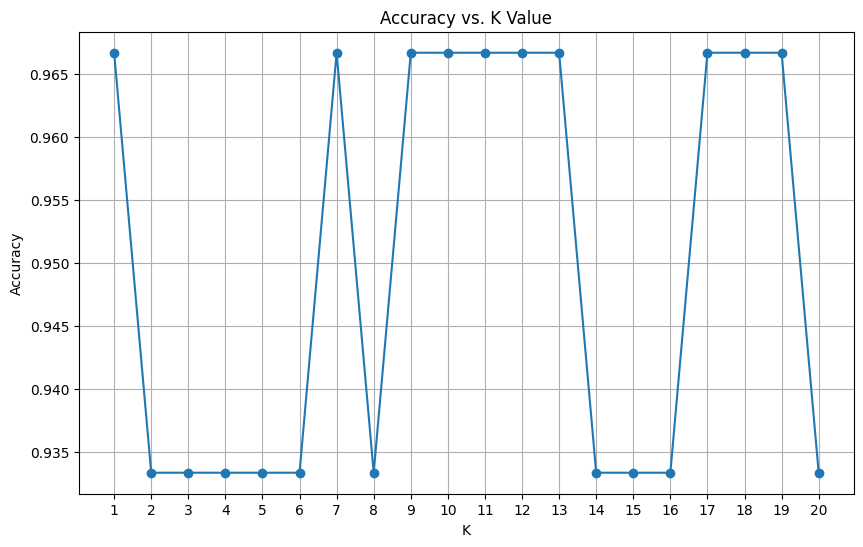

In [9]:
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid()
plt.show()

## **Visualizing Decision Boundaries (Using 2 Features)**

For simplicity, we visualize using only `PetalLengthCm` and `PetalWidthCm`.

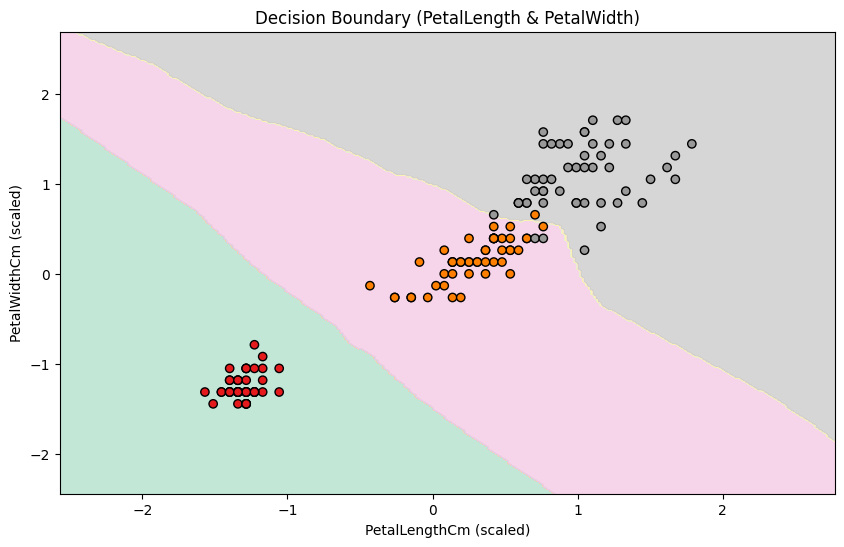

In [10]:
# Select two features
X_vis = df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = df['Species'].values

# Normalize
X_vis_scaled = scaler.fit_transform(X_vis)

# Split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.2, random_state=42, stratify=y_vis)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid
h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.Set1)
plt.title("Decision Boundary (PetalLength & PetalWidth)")
plt.xlabel("PetalLengthCm (scaled)")
plt.ylabel("PetalWidthCm (scaled)")
plt.show()

## **Key Takeaways**

- KNN is a simple, instance-based learning algorithm.
- Performance is highly dependent on the choice of `K` and the scaling of features.
- Visualization helps in understanding model behavior.